In [1]:
%load_ext sql

In [2]:
%sql postgresql://appdev@data/appdev

'Connected: appdev@appdev'

In [3]:
%matplotlib inline

In [107]:
# printing table (used for orientation)
%sql SELECT * FROM pg_catalog.pg_tables;

139 rows affected.


schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
chinook,invoice,appdev,None,True,False,True,False
chinook,customer,appdev,None,True,False,True,False
chinook,mediatype,appdev,None,True,False,True,False
chinook,playlist,appdev,None,True,False,True,False
eav,support,appdev,None,True,False,True,False
chinook,genre,appdev,None,True,False,True,False
chinook,invoiceline,appdev,None,True,False,True,False
pg_catalog,pg_statistic,postgres,None,True,False,False,False
pg_catalog,pg_type,postgres,None,True,False,False,False
chinook,track,appdev,None,True,False,True,False


### 1: In the first part you'll be processing the data in the geonames table
#### A: Find the tuple with the largest populatin

In [12]:
%%sql SELECT * FROM geonames 
ORDER BY population DESC 
LIMIT 1;

1 rows affected.


geonameid,name,longitude,latitude,feature_class,feature_code,country_code,admin1_code,admin2_code,population,elevation,timezone
305104,Levant,36.0,34.0,L,RGN,None,None,None,44990000,None,Asia/Beirut


#### B: Now calculate the distance from all locations to the tuple above using the <-> function
- 115071 is the result (limited to 100 for simplicity)

In [60]:
%sql SELECT point(geonames.longitude,geonames.latitude) <-> point(36,34) AS distance from geonames LIMIT 1000; 

1000 rows affected.


distance
35.5187260391022
35.5403912827645
35.4976906065648
35.5211340049413
35.5230848613757
35.5756544866359
35.3803392045427
35.5686877257961
35.4524960679527
35.5086914894509


#### C: Now calculate the distance from all locations to the tuple above using the haversine distance
##### a: The haversine distance has been implemented in PL/PGSQL here: https://gist.github.com/carlzulauf/1724506


In [54]:
%%sql CREATE OR REPLACE FUNCTION public.geodistance(alat double precision, alng double precision, blat double precision, blng double precision)
  RETURNS double precision AS
$BODY$
SELECT asin(
  sqrt(
    sin(radians($3-$1)/2)^2 +
    sin(radians($4-$2)/2)^2 *
    cos(radians($1)) *
    cos(radians($3))
  )
) * 7926.3352 AS distance;
$BODY$
  LANGUAGE sql IMMUTABLE
  COST 100;

Done.


[]

In [59]:
%sql SELECT geodistance(geonames.longitude,geonames.latitude, 34, 36) AS distance from geonames LIMIT 1000; 

1000 rows affected.


distance
2286.28743792344
2287.36512571255
2284.30342116008
2286.51961219582
2286.71859817054
2290.17178319537
2276.43264329327
2289.25412232879
2281.06824121392
2285.62559491552


#### D: Plot the latitude and longitude of the largest 1000 populations on a 2-D scatter plot
##### a: You can use IPython-SQL or Pandas to create the plot


In [78]:
import matplotlib.pyplot as plt

In [103]:
result1 = %sql SELECT longitude FROM geonames ORDER BY population DESC LIMIT 1000;

1000 rows affected.


In [105]:
result2 = %sql SELECT latitude FROM geonames ORDER BY population DESC LIMIT 1000;

1000 rows affected.


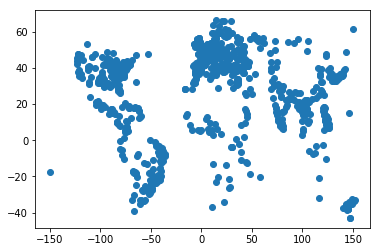

In [104]:
plt.scatter(result1,result2)

### 2: In the second part your job is to work with JSON data from the magic schema. The schema is based on the game Magic: The gathering
#### A Find all the cards that is made by Rob Alexander


In [135]:
%sql SELECT data -> 'name' as card FROM cards WHERE data @> '{"artist":"Rob Alexander"}';

401 rows affected.


card
Beacon of Immortality
Kavu Climber
Llanowar Wastes
Shivan Reef
Sulfurous Springs
Treetop Village
Plains
Forest
Badlands
Lance


#### B: Find all the cards that have the subtype "Human"

In [126]:
%sql SELECT * FROM cards limit 100;

100 rows affected.


set,data
10E,"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"
10E,"{'id': '0fb7efcdacb0ac4c73829aa08ddee55feeadb56f', 'cmc': 5, 'name': 'Angel of Mercy', 'text': 'Flying\nWhen Angel of Mercy enters the battlefield, you gain 3 life.', 'type': 'Creature — Angel', 'power': '3', 'types': ['Creature'], 'artist': 'Volkan Baga', 'colors': ['White'], 'flavor': 'Every tear shed is a drop of immortality.', 'layout': 'normal', 'number': '2', 'rarity': 'Uncommon', 'manaCost': '{4}{W}', 'subtypes': ['Angel'], 'imageName': 'angel of mercy', 'mciNumber': '2', 'toughness': '3', 'multiverseid': 129465, 'colorIdentity': ['W']}"
10E,"{'id': '0b307d9f2d99b37aa659cf6708b7747d973b6107', 'cmc': 3, 'name': 'Angelic Blessing', 'text': ""Target creature gets +3/+3 and gains flying until end of turn. (It can't be blocked except by creatures with flying or reach.)"", 'type': 'Sorcery', 'types': ['Sorcery'], 'artist': 'Mark Zug', 'colors': ['White'], 'flavor': 'Only the warrior who can admit mortal weakness will be bolstered by immortal strength.', 'layout': 'normal', 'number': '3', 'rarity': 'Common', 'manaCost': '{2}{W}', 'imageName': 'angelic blessing', 'mciNumber': '3', 'multiverseid': 129711, 'colorIdentity': ['W']}"
10E,"{'id': '34b67f8cf8651964995bfec268498082710d4c6a', 'cmc': 5, 'name': 'Angelic Chorus', 'text': 'Whenever a creature enters the battlefield under your control, you gain life equal to its toughness.', 'type': 'Enchantment', 'types': ['Enchantment'], 'artist': 'Jim Murray', 'colors': ['White'], 'flavor': 'The harmony of the glorious is a dirge to the wicked.', 'layout': 'normal', 'number': '4', 'rarity': 'Rare', 'manaCost': '{3}{W}{W}', 'imageName': 'angelic chorus', 'mciNumber': '4', 'multiverseid': 129710, 'colorIdentity': ['W']}"
10E,"{'id': 'bf37b84059fe240e735e7bef03996bd32869947e', 'cmc': 2, 'name': 'Angelic Wall', 'text': ""Defender (This creature can't attack.)\nFlying"", 'type': 'Creature — Wall', 'power': '0', 'types': ['Creature'], 'artist': 'John Avon', 'colors': ['White'], 'flavor': '""The Ancestor protects us in ways we can\'t begin to comprehend.""\n—Mystic elder', 'layout': 'normal', 'number': '5', 'rarity': 'Common', 'manaCost': '{1}{W}', 'subtypes': ['Wall'], 'imageName': 'angelic wall', 'mciNumber': '5', 'toughness': '4', 'multiverseid': 129671, 'colorIdentity': ['W']}"
10E,"{'id': '28cf1fc88c72512df98530439d45d64f441546b5', 'cmc': 3, 'name': 'Aura of Silence', 'text': 'Artifact and enchantment spells your opponents cast cost {2} more to cast.\nSacrifice Aura of Silence: Destroy target artifact or enchantment.', 'type': 'Enchantment', 'types': ['Enchantment'], 'artist': 'D. Alexander Gregory', 'colors': ['White'], 'flavor': 'Not all silences are easily broken.', 'layout': 'normal', 'number': '6', 'rarity': 'Uncommon', 'manaCost': '{1}{W}{W}', 'imageName': 'aura of silence', 'mciNumber': '6', 'multiverseid': 132127, 'colorIdentity': ['W']}"
10E,"{'id': 'c192224e04e5e4a4b4c9b7e294e634c9f67e6d8a', 'cmc': 4, 'name': 'Aven Cloudchaser', 'text': ""Flying (This creature can't be blocked except by creatures with flying or reach.)\nWhen Aven Cloudchaser enters the battlefield, destroy target enchantment."", 'type': 'Creature — Bird Soldier', 'power': '2', 'types': ['Creature'], 'artist': 'Justin Sweet', 'colors': ['White'], 'flavor': '""At the Reapportionment, Eagle begged to be human. The 

In [131]:
%sql SELECT data -> 'name' as card FROM cards WHERE data @> '{"subtypes":"Human"}';

0 rows affected.


card


#### C: Group all the cards based on the colour. Aggregate them by counting the number of cards per colour.

In [137]:
%sql SELECT data -> 'colors' as colors, count(*) FROM cards GROUP BY data -> 'colors' order by count(*);

32 rows affected.


colors,count
"['White', 'Black', 'Red', 'Green']",2
"['White', 'Blue', 'Black', 'Green']",2
"['White', 'Blue', 'Red', 'Green']",2
"['White', 'Blue', 'Black', 'Red']",2
"['Blue', 'Black', 'Red', 'Green']",3
"['White', 'Blue', 'Red']",22
"['Blue', 'Black', 'Green']",24
"['Blue', 'Red', 'Green']",25
"['White', 'Black', 'Green']",28
"['White', 'Black', 'Red']",33


In [138]:
colorresult = %sql SELECT data -> 'colors' as colors, count(*) FROM cards GROUP BY data -> 'colors' order by count(*);

32 rows affected.


<Container object of 32 artists>

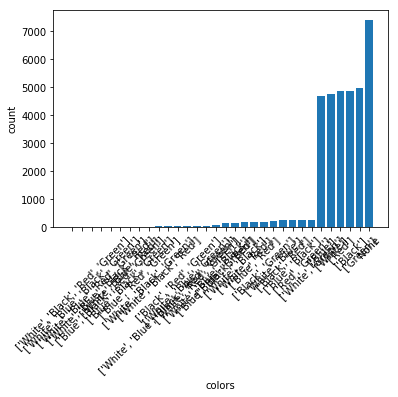

In [147]:
colorresult.bar()